In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

path='/content/drive/My Drive/Datasets/Mall_Customers.csv'
df=pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


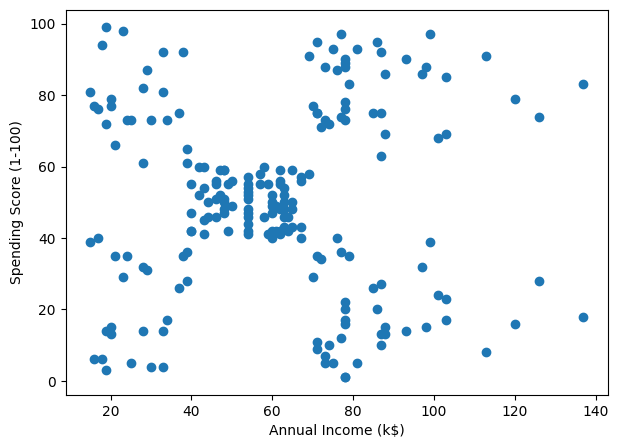

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X)


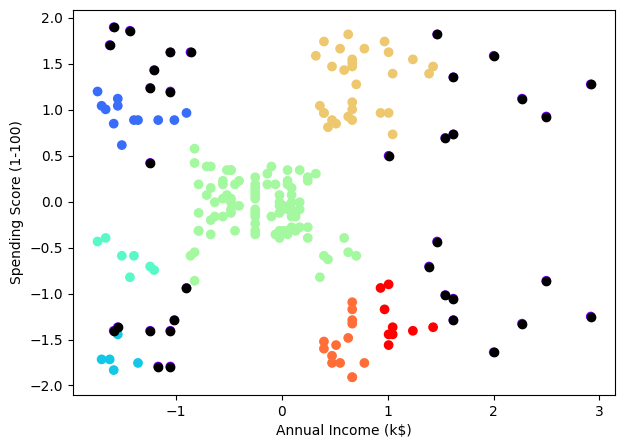

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='rainbow')
plt.scatter(X[clusters==-1,0],X[clusters==-1,1],color='black',label='Noise')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
eps_value=[0.2,0.3,0.5]
for eps in eps_value:
  print(f"\nEvaluating DBSCAN using eps={eps}")
  #apply dbscan
  dbscan=DBSCAN(eps=eps,min_samples=5)
  labels=dbscan.fit_predict(X_scaled)
  #number of clusters
  unique_labels=set(labels)
  n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0)

  #number of noise points
  n_noise=list(labels).count(-1)
  noise_ratio=n_noise/len(labels)
  print(f"Number of clusters: {n_clusters}")
  print(f"Number of noise points: ",round(noise_ratio,2))

  # print(f"Noise ratio: {noise_ratio}")
  # print(f"Number of noise points: {n_noise}")
  # print(f"Noise ratio: {round(noise_ratio,2)}")

  #silhouette_score
  silhouette_avg=silhouette_score(X_scaled,labels)
  print(f"Silhoutte score: {silhouette_avg}")





Evaluating DBSCAN using eps=0.2
Number of clusters: 7
Number of noise points:  0.39
Silhoutte score: 0.1405794267961756

Evaluating DBSCAN using eps=0.3
Number of clusters: 7
Number of noise points:  0.17
Silhoutte score: 0.31614121976731185

Evaluating DBSCAN using eps=0.5
Number of clusters: 2
Number of noise points:  0.04
Silhoutte score: 0.35044619989666004


**Task :** https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data

https://drive.google.com/file/d/15p2q_iF_Bl9Bxfy4I2V7gRA_dZcoy1N3/view?usp=sharing

1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.

2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.

3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.

4️⃣ DBSCAN Model – Experiment 1
Apply DBSCAN with:
eps = 0.2
min_samples = 5
Store cluster labels in labels_1.

5️⃣ DBSCAN Model – Experiment 2
Apply DBSCAN with:
eps = 0.3
min_samples = 5
Store cluster labels in labels_2.

6️⃣ DBSCAN Model – Experiment 3
Apply DBSCAN with:
eps = 0.5
min_samples = 5
Store cluster labels in labels_3.

7️⃣ Cluster Evaluation
For each experiment:
Print:
Number of clusters (excluding noise)
Number of noise points
Noise ratio

8️⃣ Silhouette Score Calculation
Remove noise points (-1) from each experiment.
Calculate and print the Silhouette Score for:
Experiment 1
Experiment 2
Experiment 3
If silhouette score is not applicable, print "Not Applicable".

9️⃣ Visualization
For each experiment:
Plot pickup locations using a scatter plot.
Color points based on cluster labels.
Highlight noise points using a separate color.

🔟 Best Model Selection
Based on:
Number of clusters
Noise ratio
Silhouette score
Print:
Best eps value = ___
